## Import Package and File Read

In [1]:
# Import packages
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from shapely.geometry import Point
from shapely.geometry import shape
import seaborn as sns
from datetime import datetime
import os
from zipfile import ZipFile
import random
import networkx as nx
from datetime import datetime, timedelta
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
fl_survey_numeric_data = pd.read_csv('Data/Survey/FL_Micromobility_Usage_Survey_Numeric.csv')
fl_survey_numeric_data['geometry'] = fl_survey_numeric_data[['LocationLongitude', 'LocationLatitude']].values.tolist()
fl_survey_numeric_data['geometry'] = fl_survey_numeric_data['geometry'].apply(Point)
fl_survey_numeric_data.head()

,StartDate,EndDate,Progress,Duration (in seconds),Finished,RecordedDate,LocationLatitude,LocationLongitude,Intro,Q1_1,...,Q25,Q26,Q26_8_TEXT,Q27,Q27_8_TEXT,Q28,Q28_8_TEXT,Q29,Q30,geometry
0,9/6/2023 7:22,9/6/2023 7:31,100,527,1,9/6/2023 7:31,29.6840,-82.3571,1,1.0,...,32607.0,5.0,NaN,6.0,NaN,6.0,NaN,2.0,NaN,POINT (-82.3571 29.684)
1,9/7/2023 9:50,9/7/2023 9:55,29,254,0,9/14/2023 9:55,NaN,NaN,1,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT EMPTY
2,9/15/2023 15:53,9/15/2023 16:08,100,886,1,9/15/2023 16:08,29.6138,-82.3860,1,5.0,...,32608.0,5.0,NaN,6.0,NaN,6.0,NaN,2.0,NaN,POINT (-82.386 29.6138)
3,9/16/2023 13:48,9/16/2023 13:54,100,370,1,9/16/2023 13:54,29.6138,-82.3860,1,5.0,...,NaN,5.0,NaN,5.0,NaN,6.0,NaN,1.0,NaN,POINT (-82.386 29.6138)
4,9/16/2023 14:23,9/16/2023 14:26,100,182,1,9/16/2023 14:26,29.6475,-82.4040,1,5.0,...,32601.0,5.0,NaN,6.0,NaN,1.0,NaN,4.0,no,POINT (-82.404 29.6475)


In [3]:
# total survey samples 
len(fl_survey_numeric_data)

235

In [4]:
# total survey with full, valid response 
np.sum(fl_survey_numeric_data['Finished'] == 1)

138

In [5]:
# total survey with 100 progress
np.sum(fl_survey_numeric_data['Progress'] == 100)

138

In [6]:
fl_survey_numeric_data['Q1_1'].unique()

array([ 1.,  5.,  4.,  2.,  3., nan])

In [7]:
fl_survey_numeric_data.columns

Index(['StartDate', 'EndDate', 'Progress', 'Duration (in seconds)', 'Finished',
       'RecordedDate', 'LocationLatitude', 'LocationLongitude', 'Intro',
       'Q1_1', 'Q1_2', 'Q1_3', 'Q1_4', 'Q1_5', 'Q1_5_TEXT', 'Q2', 'Q3',
       'Q3_7_TEXT', 'Q4', 'Q5_1', 'Q5_2', 'Q5_3', 'Q5_4', 'Q5_5', 'Q5_6',
       'Q5_7', 'Q5_7_TEXT', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6',
       'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q11_12_TEXT', 'Q12', 'Q13', 'Q14',
       'Q15', 'Q16', 'Q16_6_TEXT', 'Q17', 'Q18', 'Q18_7_TEXT', 'Q19',
       'Q19_7_TEXT', 'Q20', 'Q21', 'Q22', 'Q22_12_TEXT', 'Q23', 'Q24', 'Q25',
       'Q26', 'Q26_8_TEXT', 'Q27', 'Q27_8_TEXT', 'Q28', 'Q28_8_TEXT', 'Q29',
       'Q30', 'geometry'],
      dtype='object')

## Survey Distribution

### Read Boundary File 

In [8]:
fl_county_boundary = gpd.read_file('Data/Florida/fl_county_boundary/fl_county_boundary.shp')
fl_city_boundary = gpd.read_file('Data/Florida/fl_city_boundary/fl_city_boundary.shp')
fl_county_boundary.geometry = fl_county_boundary.geometry.to_crs('EPSG:4326')
fl_city_boundary.geometry = fl_city_boundary.geometry.to_crs('EPSG:4326')
# GNV_county_boundary = fl_county_boundary.loc[fl_county_boundary['COUNTY_NAM'] == 'ALACHUA']
# GNV_city_boundary = fl_city_boundary.loc[fl_city_boundary['NAME'] == 'GAINESVILLE']
# GNV_county_boundary.head()
fl_county_boundary.head() 

,FID_,COUNTY_NAM,geometry
0,0,ALACHUA,"POLYGON ((-82.41869 29.92298, -82.41825 29.922..."
1,0,BAKER,"POLYGON ((-82.45969 30.58238, -82.33278 30.574..."
2,0,BAY,"MULTIPOLYGON (((-85.48640 29.96650, -85.48616 ..."
3,0,BRADFORD,"POLYGON ((-82.04939 30.14322, -82.04924 30.128..."
4,0,BREVARD,"MULTIPOLYGON (((-80.71349 28.56402, -80.71507 ..."


### plot survey distribution

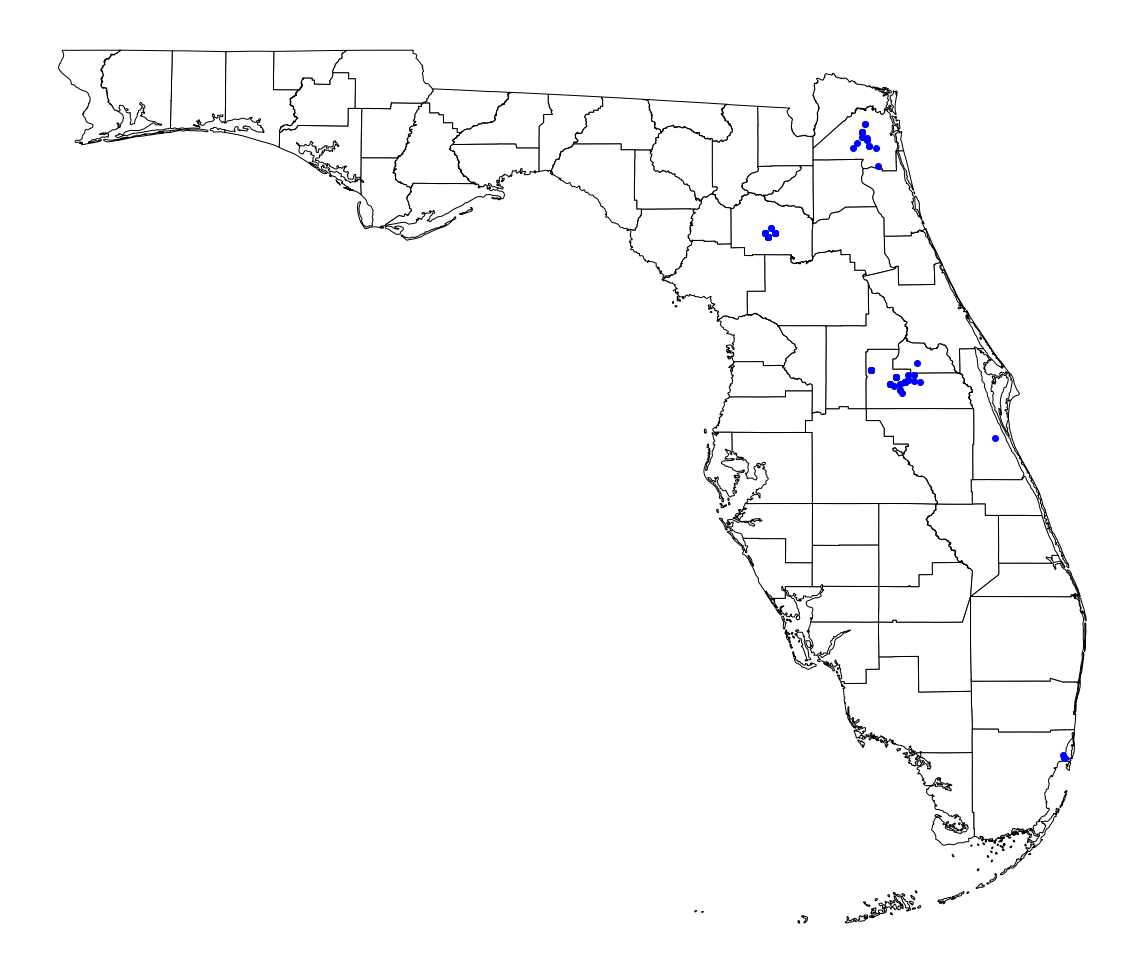

In [9]:
fig, ax = plt.subplots(figsize=(16, 16))
ax.axis('off') # remove the axies
base2 = fl_county_boundary.plot(ax=ax, edgecolor='black', facecolor='white')
fl_survey_numeric_geo = gpd.GeoDataFrame(fl_survey_numeric_data)
index_within_fl = []
for i in range (len(fl_survey_numeric_geo)):
    if np.sum(fl_county_boundary['geometry'].contains(fl_survey_numeric_geo['geometry'].iloc[i])) > 0:
        index_within_fl.append(i)
fl_survey_numeric_geo = fl_survey_numeric_geo.iloc[index_within_fl]
fl_survey_numeric_geo.plot(ax=base2, color='blue')
plt.tight_layout()
plt.show()

In [10]:
len(fl_survey_numeric_geo)

126

## Micromobility Preference Questions

### Q1: mode of transportation
- Q: How often do you utilize the following modes of transportation?
- A: Mode - Bicycle, Scooter, Driving, Public Transit, Others
- A: Frequency - Everyday, 2-3 times per week, Once per week, 2-3 times per month, Never

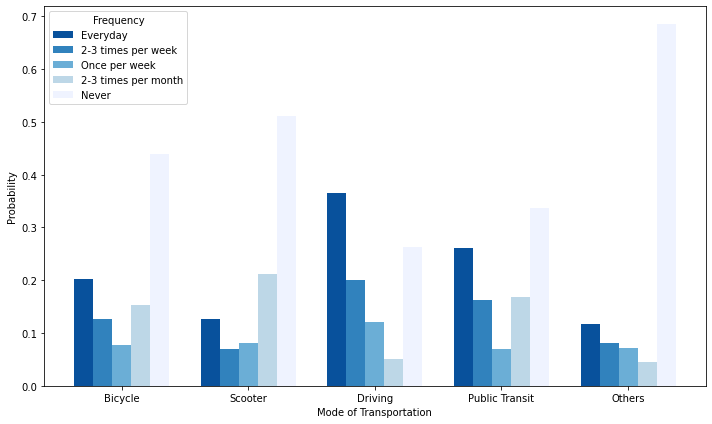

In [11]:
# Sample data for five large categories and their sub-groups
categories = ['Bicycle', 'Scooter', 'Driving', 'Public Transit', 'Others']
subcategories = ['Everyday', '2-3 times per week', 'Once per week', '2-3 times per month', 'Never']
question_name = ['Q1_1', 'Q1_2', 'Q1_3', 'Q1_4', 'Q1_5']
color_name = ['#08519c', '#3182bd', '#6baed6', '#bdd7e7', '#eff3ff']

data = np.zeros((len(categories), len(subcategories)))

for i in range (data.shape[0]):
    for j in range (data.shape[1]):
        data[i,j] = np.sum(fl_survey_numeric_data[question_name[i]] == j+1)
    data[i,:] = data[i,:]/np.sum(data[i,:])

# Number of categories and sub-categories
num_categories = len(categories)
num_subcategories = len(subcategories)

# Width of each bar
bar_width = 0.15

# Set the positions for the bars
x = np.arange(num_categories)

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(num_subcategories):
    ax.bar(x + i * bar_width, data[:, i], bar_width, label=subcategories[i], color = color_name[i])

ax.set_xlabel('Mode of Transportation')
ax.set_ylabel('Probability')
# ax.set_title('Large Categories with Subgroups')
ax.set_xticks(x + bar_width * (num_subcategories - 1) / 2)
ax.set_xticklabels(categories)
ax.legend(title='Frequency') # loc='upper right', bbox_to_anchor=(1.15, 1)

# Display the chart
plt.tight_layout()
plt.show()

### Q2: Whether to own or rent micromobility
- Q: Do you own any of the following micromobility devices (select all that apply)?
- A: Bicycle, Scooter, I don’t own but rent & ride one of them, I don’t ever ride

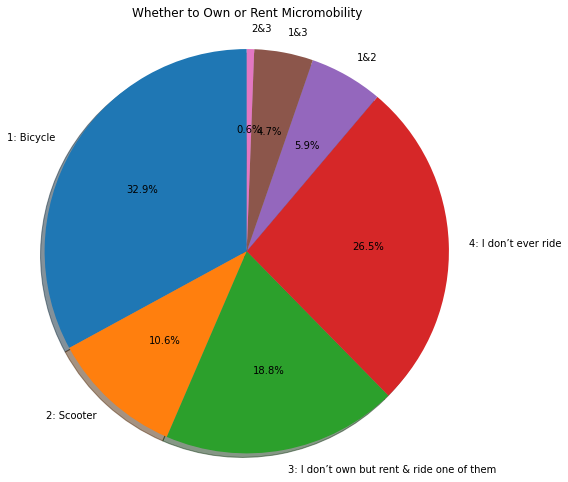

In [12]:
categories = ['1: Bicycle', '2: Scooter', '3: I don’t own but rent & ride one of them', '4: I don’t ever ride', '1&2', '1&3', '2&3']
response_name = ['1', '2', '3', '4', '1,2', '1,3', '2,3']

data = np.zeros(len(categories))
for i in range (len(data)):
    data[i] = np.sum(fl_survey_numeric_data['Q2'] == response_name[i])

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(data, labels=categories, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Whether to Own or Rent Micromobility', y=1.03)

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

### Q3: Why to Ride Micromobility
- Q: If you did ride, why do you choose to ride a bicycle/scooter (select all that apply)?
- A: Fun, Exercise and Fitness, Mental Health and Wellness, Reduce my Environment Footprint, Cost-effectiveness, Faster Travel Time, Others (i.e., Parking, Already owned, To learn)

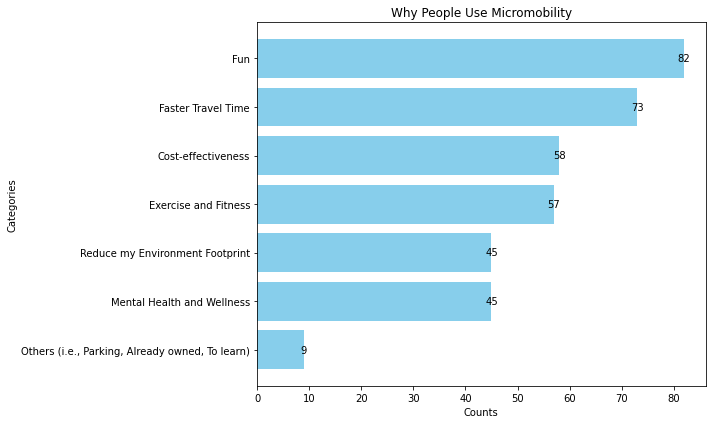

In [13]:
categories = ['Fun', 'Exercise and Fitness', 'Mental Health and Wellness', 'Reduce my Environment Footprint', 
              'Cost-effectiveness', 'Faster Travel Time', 'Others (i.e., Parking, Already owned, To learn)']
response_name = ['1', '2', '3', '4', '5', '6', '7']
list_unique = list(fl_survey_numeric_data['Q3'].unique()[0:3]) + list(fl_survey_numeric_data['Q3'].unique()[4:])

data = np.zeros(len(categories))
for i in range (len(fl_survey_numeric_data['Q3'])):
    for j in range (len(response_name)):
        if fl_survey_numeric_data.iloc[i]['Q3'] in list_unique:
            if response_name[j] in fl_survey_numeric_data.iloc[i]['Q3']:
                data[j] += 1

# Create a horizontal bar chart

sorted_data = sorted(zip(data, categories), reverse=False)
data, categories = zip(*sorted_data)

plt.figure(figsize=(10, 6))
bars = plt.barh(categories, data, color='skyblue')
plt.xlabel('Counts')
plt.ylabel('Categories')
plt.title('Why People Use Micromobility')
#plt.axis('off')

for bar, value in zip(bars, data):
    plt.text(value, bar.get_y() + bar.get_height() / 2, int(value), ha='center', va='center', color='black')

# Display the chart
plt.tight_layout()
plt.show()

### Q4: Types of Micromobility Users
- Q: What type of micromobility (i.e., bicycle, scooter) riders would you consider yourself?
- A: Strong and fearless, Enthused and confident, Interested but concerned, Do not know

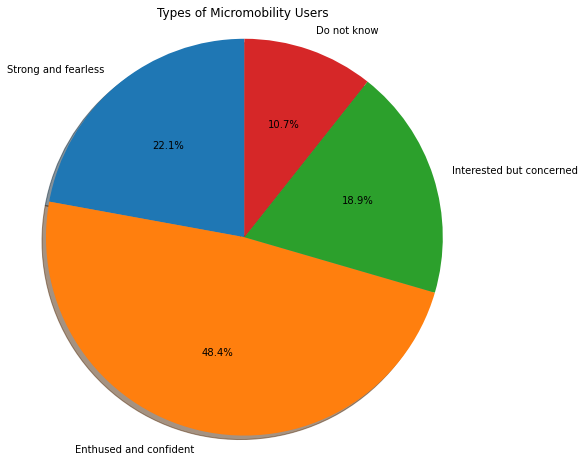

In [14]:

categories = ['Strong and fearless', 'Enthused and confident', 'Interested but concerned', 'Do not know']
response_name = [1, 2, 3, 4]

data = np.zeros(len(categories))
for i in range (len(data)):
    data[i] = np.sum(fl_survey_numeric_data['Q4'] == response_name[i])

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(data, labels=categories, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Types of Micromobility Users', y=1)

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

### Q5: Frequency & Purposes of Micromobility Rides
- Q: How frequently do you ride a bicycle/scooter for any of the following activities?
- A: Purpose - Commuting to work/school, Getting to transit stops, Running quick errands, Shopping, Recreation, Health and fitness, Others (i.e., Attending Events)
- A: Frequency - Everyday, 2-3 times per week, Once per week, 2-3 times per month, Never

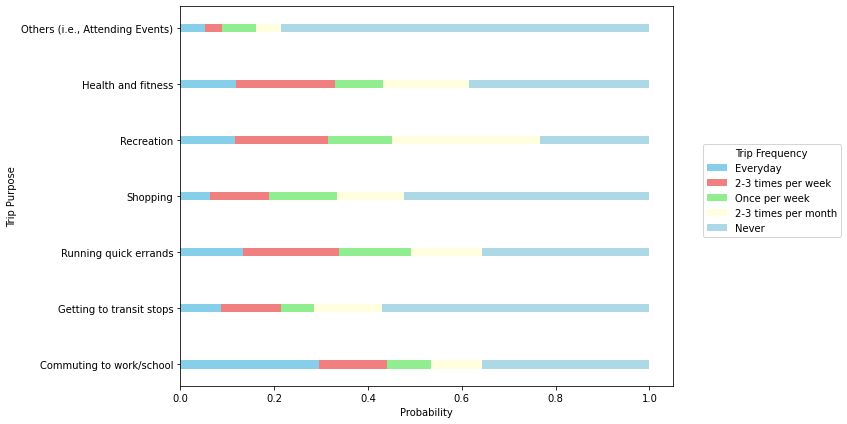

In [15]:
# Sample data for five large categories and their sub-groups
categories = ['Commuting to work/school', 'Getting to transit stops', 'Running quick errands', 'Shopping', 'Recreation', 'Health and fitness', 'Others (i.e., Attending Events)']
subcategories = ['Everyday', '2-3 times per week', 'Once per week', '2-3 times per month', 'Never']
question_name = ['Q5_1', 'Q5_2', 'Q5_3', 'Q5_4', 'Q5_5', 'Q5_6', 'Q5_7']

data = np.zeros((len(categories), len(subcategories)))

for i in range (data.shape[0]):
    for j in range (data.shape[1]):
        data[i,j] = np.sum(fl_survey_numeric_data[question_name[i]] == j+1)
    data[i,:] = data[i,:]/np.sum(data[i,:])


# Sample data for a horizontal aggregated bar chart
values1 = data[:,0]
values2 = data[:,1]
values3 = data[:,2]
values4 = data[:,3]
values5 = data[:,4]

# Calculate the y-axis positions for bars
y = np.arange(len(categories))

# Set the width of the bars
bar_width = 0.15

# Create the horizontal aggregated bar chart
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.barh(y, values1, bar_width, label=subcategories[0], color='skyblue')
bar2 = ax.barh(y, values2, bar_width, left=values1, label=subcategories[1], color='lightcoral')
bar3 = ax.barh(y, values3, bar_width, left=np.add(values1, values2), label=subcategories[2], color='lightgreen')
bar4 = ax.barh(y, values4, bar_width, left=np.add(np.add(values1, values2), values3), label=subcategories[3], color='lightyellow')
bar5 = ax.barh(y, values5, bar_width, left=np.add(np.add(np.add(values1, values2), values3), values4), label=subcategories[4], color='lightblue')

# Set the y-axis labels
ax.set_yticks(y)
ax.set_yticklabels(categories)

ax.set_xlabel('Probability')
ax.set_ylabel('Trip Purpose')
ax.legend(title='Trip Frequency', bbox_to_anchor=(1.05, 0.65)) # loc='upper right', bbox_to_anchor=(1.15, 1)

# Display the chart
plt.tight_layout()
plt.show()

### Q6: Ratings of Bike/Scooter Infrastructure
- Q: How would you rate the following bicycle/scooter infrastructure in your community?
- A: Bike lane, Racks for free parking, Secure access parking (locker, valet), Trail, Wayfinding/directional signs for riding, Shared micromobility programs

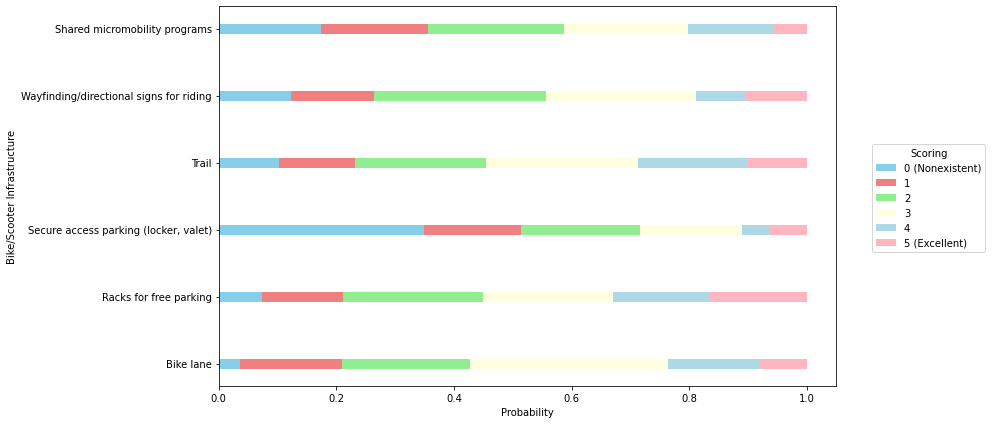

In [16]:
# Sample data for five large categories and their sub-groups
categories = ['Bike lane', 'Racks for free parking', 'Secure access parking (locker, valet)', 'Trail', 'Wayfinding/directional signs for riding', 'Shared micromobility programs']
subcategories = ['0 (Nonexistent)', '1', '2', '3', '4', '5 (Excellent)']
question_name = ['Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6']

data = np.zeros((len(categories), len(subcategories)))

for i in range (data.shape[0]):
    for j in range (data.shape[1]):
        data[i,j] = np.sum(fl_survey_numeric_data[question_name[i]] == j+1)
    data[i,:] = data[i,:]/np.sum(data[i,:])


# Sample data for a horizontal aggregated bar chart
values1 = data[:,0]
values2 = data[:,1]
values3 = data[:,2]
values4 = data[:,3]
values5 = data[:,4]
values6 = data[:,5]

# Calculate the y-axis positions for bars
y = np.arange(len(categories))

# Set the width of the bars
bar_width = 0.15

# Create the horizontal aggregated bar chart
fig, ax = plt.subplots(figsize=(14, 6))

bar1 = ax.barh(y, values1, bar_width, label=subcategories[0], color='skyblue')
bar2 = ax.barh(y, values2, bar_width, left=values1, label=subcategories[1], color='lightcoral')
bar3 = ax.barh(y, values3, bar_width, left=np.add(values1, values2), label=subcategories[2], color='lightgreen')
bar4 = ax.barh(y, values4, bar_width, left=np.add(np.add(values1, values2), values3), label=subcategories[3], color='lightyellow')
bar5 = ax.barh(y, values5, bar_width, left=np.add(np.add(np.add(values1, values2), values3), values4), label=subcategories[4], color='lightblue')
bar6 = ax.barh(y, values6, bar_width, left=np.add(np.add(np.add(np.add(values1, values2), values3), values4), values5), label=subcategories[5], color='lightpink')

# Set the y-axis labels
ax.set_yticks(y)
ax.set_yticklabels(categories)

ax.set_xlabel('Probability')
ax.set_ylabel('Bike/Scooter Infrastructure')
ax.legend(title='Scoring', bbox_to_anchor=(1.05, 0.65)) # loc='upper right', bbox_to_anchor=(1.15, 1)

# Display the chart
plt.tight_layout()
plt.show()

### Q7: Intention to Use Electric Micromobility
- Q:  Would you be more likely to ride if you had access to an electric bicycle/scooter in contrast to non-electric one?
- A: Yes, No, Maybe

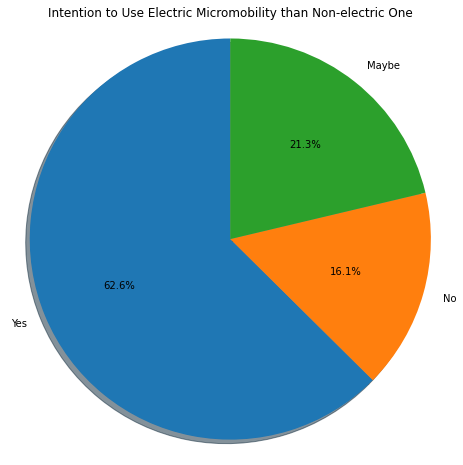

In [17]:
categories = ['Yes', 'No', 'Maybe']
response_name = [1, 2, 3]

data = np.zeros(len(categories))
for i in range (len(data)):
    data[i] = np.sum(fl_survey_numeric_data['Q7'] == response_name[i])

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(data, labels=categories, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Intention to Use Electric Micromobility than Non-electric One', y=1)

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

### Q8: Intention to Use Dockless Micromobility
- Q: Would you be more likely to ride if you had access to a dockless bicycle/scooter in contrast to docked one?
- A: Yes, No, Maybe

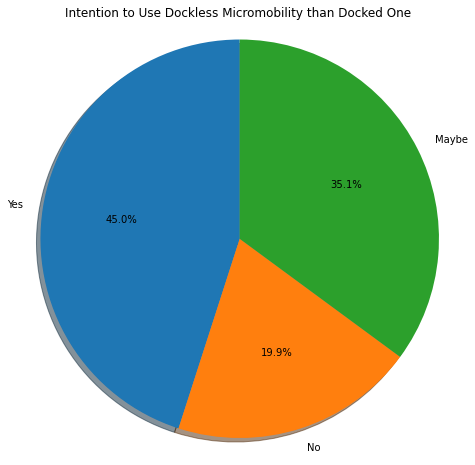

In [18]:
categories = ['Yes', 'No', 'Maybe']
response_name = [1, 2, 3]

data = np.zeros(len(categories))
for i in range (len(data)):
    data[i] = np.sum(fl_survey_numeric_data['Q8'] == response_name[i])

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(data, labels=categories, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Intention to Use Dockless Micromobility than Docked One', y=1)

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

### Q9: Likelihood to Use Micromobility if Easily Accessible and Available
- Q: How likely are you to use a bicycle/scooter for travel purposes if bicycle/scooter is easily accessible and available?
- A: Very likely, Likely, Open to it but interested in more info, Neutral, Not likely

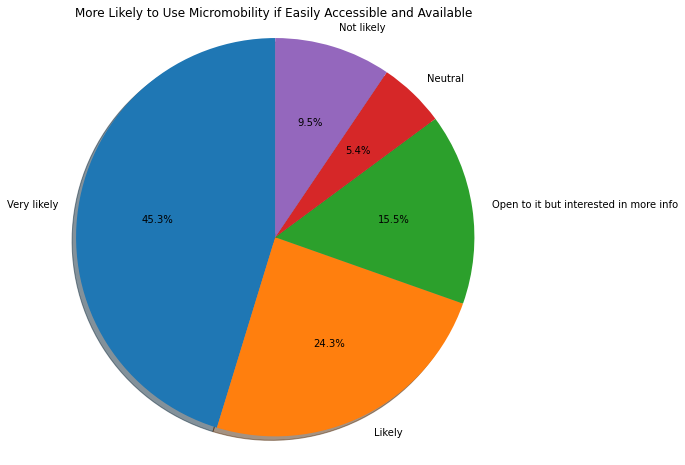

In [19]:
categories = ['Very likely', 'Likely', 'Open to it but interested in more info', 'Neutral', 'Not likely']
response_name = [1, 2, 3, 4, 5]

data = np.zeros(len(categories))
for i in range (len(data)):
    data[i] = np.sum(fl_survey_numeric_data['Q9'] == response_name[i])

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(data, labels=categories, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('More Likely to Use Micromobility if Easily Accessible and Available', y=1)

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

### Q10: Likelihood to Use Micromobility Given a Better and Safer Riding Environment
- Q: How likely are you to use a bicycle/scooter for travel purposes given a better and safer riding environment?
- A: Very likely, Likely, Open to it but interested in more info, Neutral, Not likely

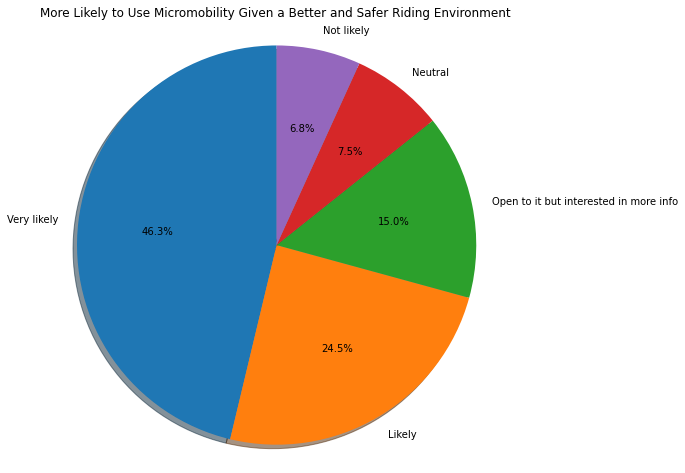

In [20]:
categories = ['Very likely', 'Likely', 'Open to it but interested in more info', 'Neutral', 'Not likely']
response_name = [1, 2, 3, 4, 5]

data = np.zeros(len(categories))
for i in range (len(data)):
    data[i] = np.sum(fl_survey_numeric_data['Q10'] == response_name[i])

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(data, labels=categories, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('More Likely to Use Micromobility Given a Better and Safer Riding Environment', y=1.02)

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

### Q11: Why Not to Ride Micromobility
- Q: If you didn’t ride, what prevents you from using bicycles or scooters for any purpose (select all that apply)?
- A: I don’t know how to ride, Weather, Too expensive to rent and ride, Too far to get to most destinations, Lack of adequate parking space at destinations, Lack of safe bicycle/scooter storage at destinations, Fear of frequent bike/scooter theft, Lack of bike lanes or safe routes, Lack of information on safe trip, Fear of conflicts with automobiles, Geographic barriers (i.e., hills, slopes, bridges), Others (No separate trail, Not available, No idea of service areas)

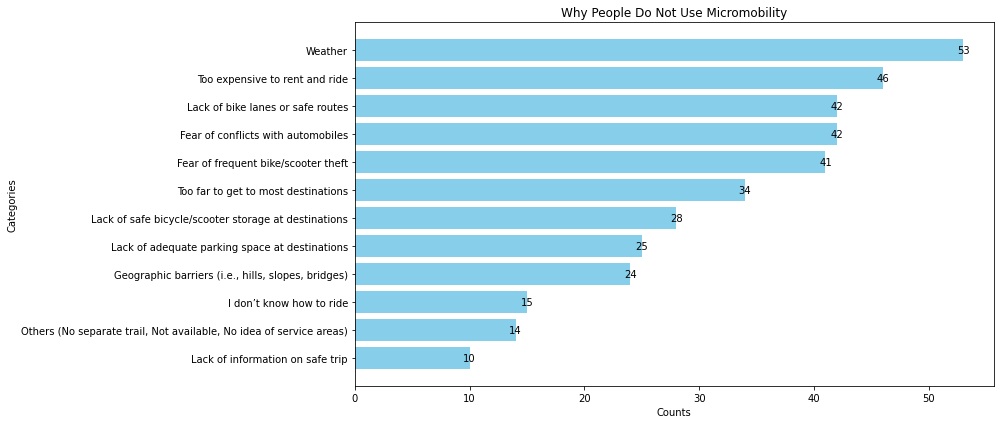

In [21]:
categories = ['I don’t know how to ride', 'Weather', 'Too expensive to rent and ride', 'Too far to get to most destinations',
              'Lack of adequate parking space at destinations', 'Lack of safe bicycle/scooter storage at destinations',
              'Fear of frequent bike/scooter theft', 'Lack of bike lanes or safe routes', 'Lack of information on safe trip',
              'Fear of conflicts with automobiles', 'Geographic barriers (i.e., hills, slopes, bridges)', 'Others (No separate trail, Not available, No idea of service areas)']
response_name = ['1,', '2,', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
list_unique = list(fl_survey_numeric_data['Q11'].unique()[0]) + list(fl_survey_numeric_data['Q11'].unique()[2:]) # remove nan

data = np.zeros(len(categories))
data[0] = np.sum(fl_survey_numeric_data['Q11'] == '1')
data[1] = np.sum(fl_survey_numeric_data['Q11'] == '2')
for i in range (len(fl_survey_numeric_data['Q11'])):
    for j in range (len(response_name)):
        if fl_survey_numeric_data.iloc[i]['Q11'] in list_unique:
            if response_name[j] in fl_survey_numeric_data.iloc[i]['Q11']:
                data[j] += 1
data[0] = data[0] - 5

# Create a horizontal bar chart

sorted_data = sorted(zip(data, categories), reverse=False)
data, categories = zip(*sorted_data)

plt.figure(figsize=(14, 6))
bars = plt.barh(categories, data, color='skyblue')
plt.xlabel('Counts')
plt.ylabel('Categories')
plt.title('Why People Do Not Use Micromobility')
#plt.axis('off')

for bar, value in zip(bars, data):
    plt.text(value, bar.get_y() + bar.get_height() / 2, int(value), ha='center', va='center', color='black')

# Display the chart
plt.tight_layout()
plt.show()

In [22]:
fl_survey_numeric_data['Q11'].unique()

array(['2,4,8', nan, '2,4,5,6,8,10', '1', '8,9,10', '8', '2,4,8,10,11',
       '2', '2,3,5', '3,4', '2,5,7', '11', '2,3,4,5,6,7,9', '2,3,4,8,10',
       '2,4', '5,7,10', '6', '1,9', '3,6,7', '5', '2,3', '2,3,6,7,10,11',
       '4', '1,2,3,7,9,10,11', '3,6,7,8,10,11', '4,5,6,8,11', '1,10',
       '4,7', '2,3,5,8,10,11', '2,4,6,7,8,10', '2,3,11,12', '7,12',
       '6,7,8', '5,11', '1,3,11,12', '1,2,3,7,10', '2,3,7', '3,7,8,10',
       '3,6,7,8,10', '12', '2,3,4,7,11', '4,5,7,8', '2,3,4,7',
       '3,4,5,6,7,8,11', '3,4,5,8,10', '1,5,6,7,10', '6,7,8,10', '4,5,7',
       '2,5,8,10,12', '7', '3,6,8', '2,5', '2,6,8,10', '5,6,7,8,10', '3',
       '2,3,10', '3,7,11', '3,5,6,7', '3,7,8,9,10', '4,8,10', '4,7,11',
       '2,3,4', '1,2', '2,3,4,8,10,12', '2,4,11', '11,12', '1,6',
       '2,3,4,5,6,7,8,9,10,11,12', '3,8,10', '2,6,8', '2,3,5,7',
       '2,5,6,7,8,10', '2,3,4,6,7', '4,7,8,10,11', '2,3,5,6,8,10',
       '4,5,6,8,9,10,12', '2,5,6,7', '2,4,7,8,9,10', '2,4,8,10,11,12',
       '8,10', '2,

### Q12: Crash While Riding
- Q: Have you ever been involved in a crash while riding a bicycle/scooter?
- A: Yes, No

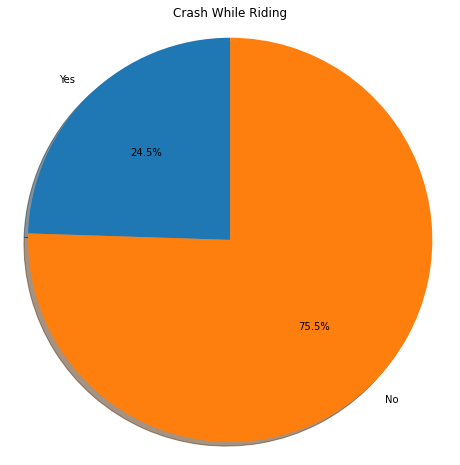

In [23]:
categories = ['Yes', 'No']
response_name = [1, 2]

data = np.zeros(len(categories))
for i in range (len(data)):
    data[i] = np.sum(fl_survey_numeric_data['Q12'] == response_name[i])

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(data, labels=categories, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Crash While Riding', y=1)

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

## Integration With Public Transit

### Q13: Distanace Between Residence and Transit Stops
- Q: About how close is the nearest transit stop to your residence?
- A: Less than 1 block, 1-4 blocks (about 330 feet to 0.25 mile), 5-8 blocks (0.25-0.5 mile), 9-16 blocks (0.5-1 mile), Over 16 blocks (1-2 mile), 2-5 miles, Over 5 miles, Don’t know

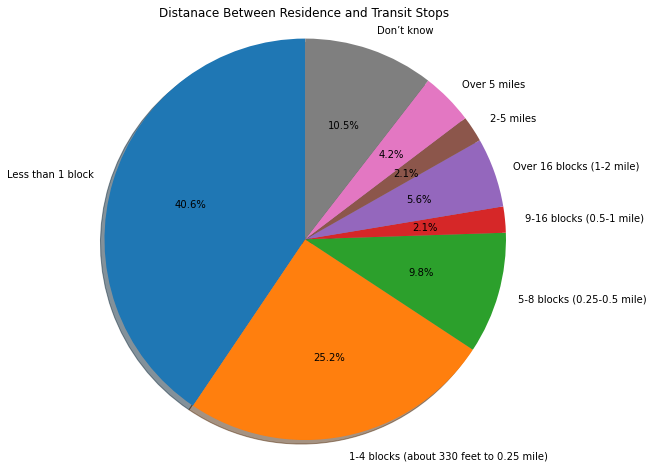

In [24]:
categories = ['Less than 1 block', '1-4 blocks (about 330 feet to 0.25 mile)', '5-8 blocks (0.25-0.5 mile)',
              '9-16 blocks (0.5-1 mile)', 'Over 16 blocks (1-2 mile)', '2-5 miles', 'Over 5 miles', 'Don’t know']
response_name = [1, 2, 3, 4, 5, 6, 7, 8]

data = np.zeros(len(categories))
for i in range (len(data)):
    data[i] = np.sum(fl_survey_numeric_data['Q13'] == response_name[i])

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(data, labels=categories, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Distanace Between Residence and Transit Stops', y=1)

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

[[ 4.  3.  2.  6. 42.]
 [ 4.  2.  2.  3. 25.]
 [ 1.  4.  0.  1.  7.]
 [ 0.  0.  0.  0.  3.]
 [ 1.  2.  0.  2.  2.]
 [ 0.  0.  0.  0.  3.]
 [ 1.  0.  0.  0.  5.]
 [ 0.  0.  1.  0. 13.]]


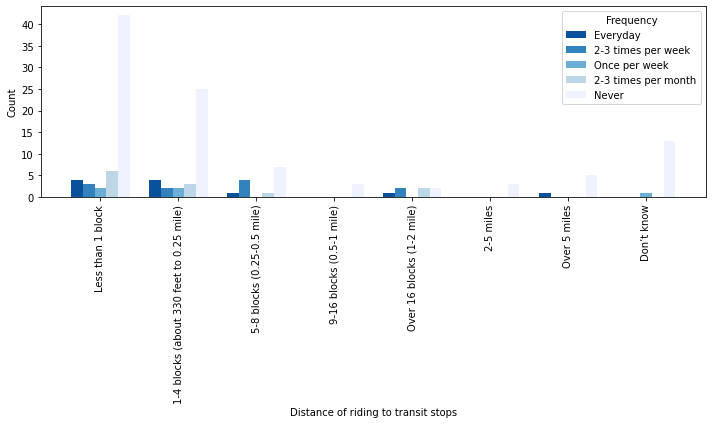

In [33]:
# Sample data for five large categories and their sub-groups
categories = ['Less than 1 block', '1-4 blocks (about 330 feet to 0.25 mile)', '5-8 blocks (0.25-0.5 mile)',
              '9-16 blocks (0.5-1 mile)', 'Over 16 blocks (1-2 mile)', '2-5 miles', 'Over 5 miles', 'Don’t know']
subcategories = ['Everyday', '2-3 times per week', 'Once per week', '2-3 times per month', 'Never']
# question_name = ['Q1_1', 'Q1_2', 'Q1_3', 'Q1_4', 'Q1_5']
color_name = ['#08519c', '#3182bd', '#6baed6', '#bdd7e7', '#eff3ff']

data = np.zeros((len(categories), len(subcategories)))

for i in range (data.shape[0]):
    data_samples_m = fl_survey_numeric_data[fl_survey_numeric_data['Q13'] == i+1]
    for j in range (data.shape[1]):
        data[i,j] = np.sum(data_samples_m['Q15'] == j+1)
    # data[i,:] = data[i,:]/np.sum(data[i,:])

# Number of categories and sub-categories
num_categories = len(categories)
num_subcategories = len(subcategories)

# Width of each bar
bar_width = 0.15

# Set the positions for the bars
x = np.arange(num_categories)

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(num_subcategories):
    ax.bar(x + i * bar_width, data[:, i], bar_width, label=subcategories[i], color = color_name[i])

ax.set_xlabel('Distance of riding to transit stops')
ax.set_ylabel('Count')
# ax.set_title('Large Categories with Subgroups')
ax.set_xticks(x + bar_width * (num_subcategories - 1) / 2)
ax.set_xticklabels(categories)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.legend(title='Frequency') # loc='upper right', bbox_to_anchor=(1.15, 1)
print(data)
# Display the chart
plt.tight_layout()
plt.show()

### Q14: Trip Duration of Riding to Transit Stops
- Q: How long do you think it would take you to ride to your nearest public transit stop?
- A: Below 10 min, 10-20 min, 21-30 min, 31-60 min, Over 1 h, Don’t know

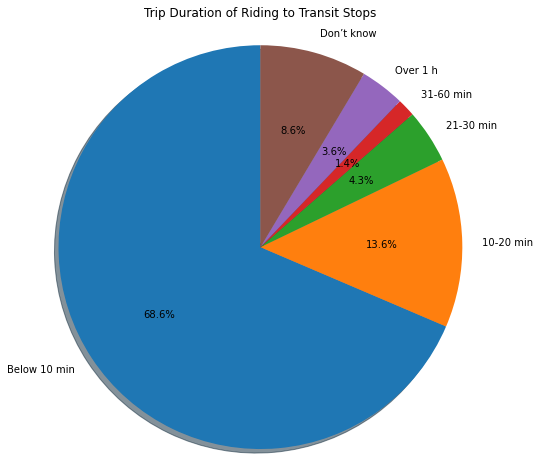

In [25]:
categories = ['Below 10 min', '10-20 min', '21-30 min', '31-60 min', 'Over 1 h', 'Don’t know']
response_name = [1, 2, 3, 4, 5, 6]

data = np.zeros(len(categories))
for i in range (len(data)):
    data[i] = np.sum(fl_survey_numeric_data['Q14'] == response_name[i])

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(data, labels=categories, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Trip Duration of Riding to Transit Stops', y=1.02)

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

[[ 8.  2.  4.  7. 74.]
 [ 1.  7.  1.  2.  8.]
 [ 0.  1.  0.  1.  3.]
 [ 0.  0.  0.  0.  2.]
 [ 1.  0.  0.  2.  2.]
 [ 1.  0.  0.  0. 11.]]


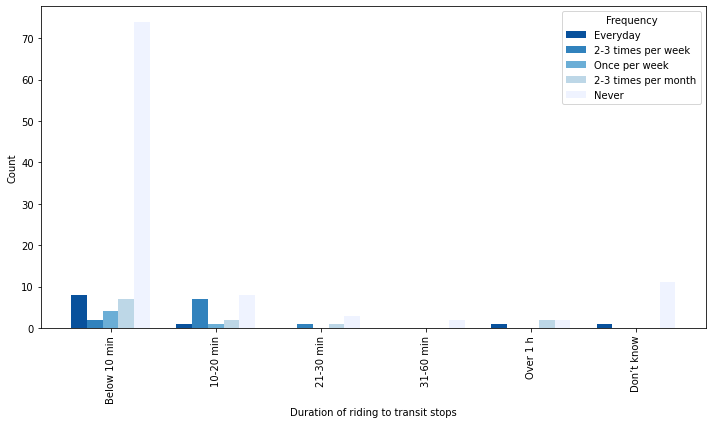

In [31]:
# Sample data for five large categories and their sub-groups
categories = ['Below 10 min', '10-20 min', '21-30 min', '31-60 min', 'Over 1 h', 'Don’t know']
subcategories = ['Everyday', '2-3 times per week', 'Once per week', '2-3 times per month', 'Never']
# question_name = ['Q1_1', 'Q1_2', 'Q1_3', 'Q1_4', 'Q1_5']
color_name = ['#08519c', '#3182bd', '#6baed6', '#bdd7e7', '#eff3ff']

data = np.zeros((len(categories), len(subcategories)))

for i in range (data.shape[0]):
    data_samples_m = fl_survey_numeric_data[fl_survey_numeric_data['Q14'] == i+1]
    for j in range (data.shape[1]):
        data[i,j] = np.sum(data_samples_m['Q15'] == j+1)
    # data[i,:] = data[i,:]/np.sum(data[i,:])

# Number of categories and sub-categories
num_categories = len(categories)
num_subcategories = len(subcategories)

# Width of each bar
bar_width = 0.15

# Set the positions for the bars
x = np.arange(num_categories)

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(num_subcategories):
    ax.bar(x + i * bar_width, data[:, i], bar_width, label=subcategories[i], color = color_name[i])

ax.set_xlabel('Duration of riding to transit stops')
ax.set_ylabel('Count')
# ax.set_title('Large Categories with Subgroups')
ax.set_xticks(x + bar_width * (num_subcategories - 1) / 2)
ax.set_xticklabels(categories)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.legend(title='Frequency') # loc='upper right', bbox_to_anchor=(1.15, 1)
print(data)
# Display the chart
plt.tight_layout()
plt.show()

### Q15: Frequency of Riding to Transit Stops
- Q: How often do you use a bicycle/scooter to get to transit stops?
- A: Everyday, 2-3 times per week, Once per week, 2-3 times per month, Never

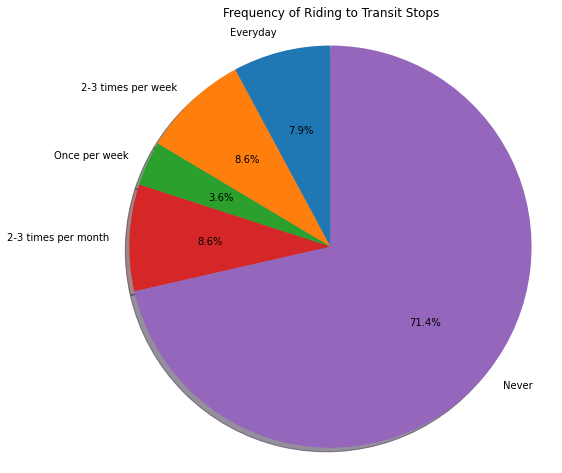

In [26]:
categories = ['Everyday', '2-3 times per week', 'Once per week', '2-3 times per month', 'Never']
response_name = [1, 2, 3, 4, 5]

data = np.zeros(len(categories))
for i in range (len(data)):
    data[i] = np.sum(fl_survey_numeric_data['Q15'] == response_name[i])

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(data, labels=categories, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Frequency of Riding to Transit Stops', y=1.02)

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

### Q16: Trip Purpose of Riding to Transit Stops
- Q: For what purpose(s) do you use a bicycle/scooter to get to transit stops (select all that apply)?
- A: Commuting, Recreation, Exercise, Tourism, Shopping, Others

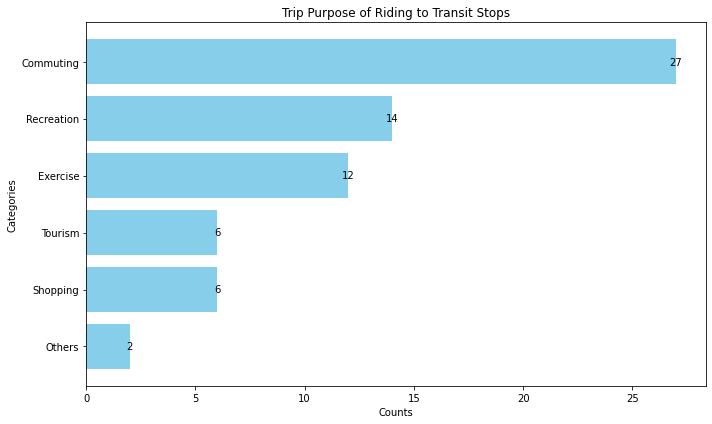

In [27]:
categories = ['Commuting', 'Recreation', 'Exercise', 'Tourism', 'Shopping', 'Others']
response_name = ['1', '2', '3', '4', '5', '6']
list_unique = list(fl_survey_numeric_data['Q16'].unique()[1:])

data = np.zeros(len(categories))
for i in range (len(fl_survey_numeric_data['Q16'])):
    for j in range (len(response_name)):
        if fl_survey_numeric_data.iloc[i]['Q16'] in list_unique:
            if response_name[j] in fl_survey_numeric_data.iloc[i]['Q16']:
                data[j] += 1

# Create a horizontal bar chart

sorted_data = sorted(zip(data, categories), reverse=False)
data, categories = zip(*sorted_data)

plt.figure(figsize=(10, 6))
bars = plt.barh(categories, data, color='skyblue')
plt.xlabel('Counts')
plt.ylabel('Categories')
plt.title('Trip Purpose of Riding to Transit Stops')

for bar, value in zip(bars, data):
    plt.text(value, bar.get_y() + bar.get_height() / 2, int(value), ha='center', va='center', color='black')

# Display the chart
plt.tight_layout()
plt.show()

### Q17: Frequency of Unable to Bring Micromobiliy Onboard a Bus due to Full Rack
- Q: How often have you tried to bring a bike/scooter onboard a bus, but were unable to because the rack was full?
- A: Everyday, Once per week, 2-3 times per month, Never, n/a(No racks for buses in my area)

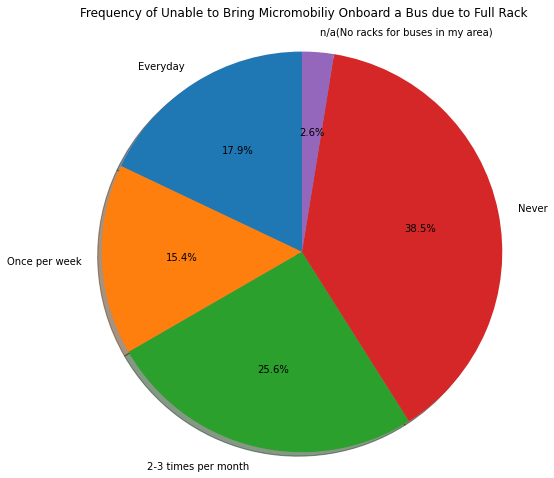

In [28]:
categories = ['Everyday', 'Once per week', '2-3 times per month', 'Never', 'n/a(No racks for buses in my area)']
response_name = [1, 2, 3, 4, 5]

data = np.zeros(len(categories))
for i in range (len(data)):
    data[i] = np.sum(fl_survey_numeric_data['Q17'] == response_name[i])

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(data, labels=categories, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Frequency of Unable to Bring Micromobiliy Onboard a Bus due to Full Rack', y=1.03)

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

### Q18: More Likely to Ride to Transit Stops with Improvements of Public Transit Systems
- Q: If public transit systems had any of the following improvements would you be more likely to use a bike/scooter to get to transit stops (select all that apply)?
- A: Extend operation time, Increase transit frequency, Broaden service areas, More racks on a bus, Fare discount policy using a bike/scooter, Spacious bus interior for bike/scooter parking, Other (Not available, Do not use public transit)

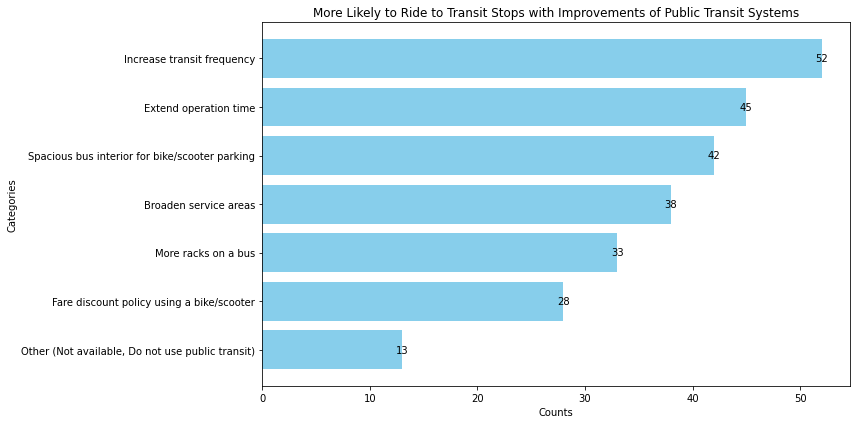

In [29]:
categories = ['Extend operation time', 'Increase transit frequency', 'Broaden service areas', 'More racks on a bus',
              'Fare discount policy using a bike/scooter', 'Spacious bus interior for bike/scooter parking', 'Other (Not available, Do not use public transit)']
response_name = ['1', '2', '3', '4', '5', '6', '7']
list_unique = list(fl_survey_numeric_data['Q18'].unique()[0]) + list(fl_survey_numeric_data['Q18'].unique()[2:])

data = np.zeros(len(categories))
for i in range (len(fl_survey_numeric_data['Q18'])):
    for j in range (len(response_name)):
        if fl_survey_numeric_data.iloc[i]['Q18'] in list_unique:
            if response_name[j] in fl_survey_numeric_data.iloc[i]['Q18']:
                data[j] += 1

# Create a horizontal bar chart

sorted_data = sorted(zip(data, categories), reverse=False)
data, categories = zip(*sorted_data)

plt.figure(figsize=(12, 6))
bars = plt.barh(categories, data, color='skyblue')
plt.xlabel('Counts')
plt.ylabel('Categories')
plt.title('More Likely to Ride to Transit Stops with Improvements of Public Transit Systems')

for bar, value in zip(bars, data):
    plt.text(value, bar.get_y() + bar.get_height() / 2, int(value), ha='center', va='center', color='black')

# Display the chart
plt.tight_layout()
plt.show()

### Q19: More Likely to Ride to Transit Stops with Amenities in Transit Hub
- Q: If your transit hub had any of the following amenities would you be more likely to use a bicycle/scooter to get to transit stops (select all that apply)?
- A: More bicycle/scooter racks, Racks for free parking, Secure access parking (lockers, cages, valet), Bike/scooter repair services, Personal lockers for gear/clothing, Coffee shop, Others (Do not use public transit)

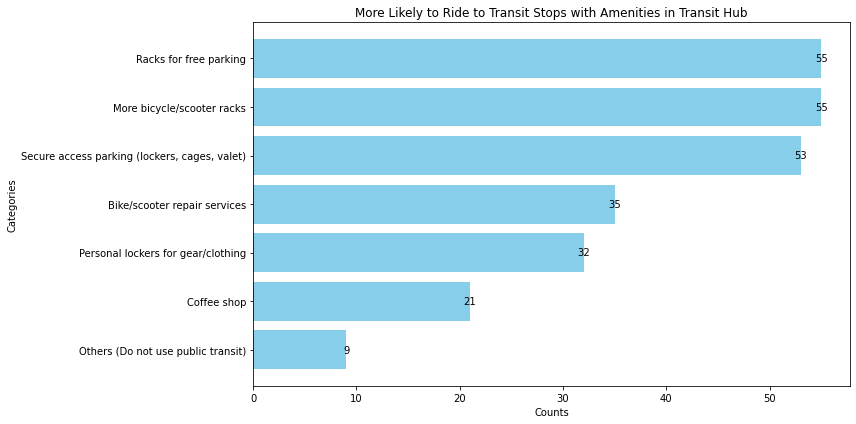

In [30]:
categories = ['More bicycle/scooter racks', 'Racks for free parking', 'Secure access parking (lockers, cages, valet)',
              'Bike/scooter repair services', 'Personal lockers for gear/clothing', 'Coffee shop', 'Others (Do not use public transit)']
response_name = ['1', '2', '3', '4', '5', '6', '7']
list_unique = list(fl_survey_numeric_data['Q19'].unique()[0]) + list(fl_survey_numeric_data['Q19'].unique()[2:])

data = np.zeros(len(categories))
for i in range (len(fl_survey_numeric_data['Q19'])):
    for j in range (len(response_name)):
        if fl_survey_numeric_data.iloc[i]['Q19'] in list_unique:
            if response_name[j] in fl_survey_numeric_data.iloc[i]['Q19']:
                data[j] += 1

# Create a horizontal bar chart

sorted_data = sorted(zip(data, categories), reverse=False)
data, categories = zip(*sorted_data)

plt.figure(figsize=(12, 6))
bars = plt.barh(categories, data, color='skyblue')
plt.xlabel('Counts')
plt.ylabel('Categories')
plt.title('More Likely to Ride to Transit Stops with Amenities in Transit Hub')

for bar, value in zip(bars, data):
    plt.text(value, bar.get_y() + bar.get_height() / 2, int(value), ha='center', va='center', color='black')

# Display the chart
plt.tight_layout()
plt.show()

### Q20: Intention to Pay a Nominal Fee for Safely Locking
- Q: If you own a bicycle/scooter, would you consider paying a nominal fee to safely lock it near a local transit hub?
- A: Yes ($0.5), Yes ($1), Yes ($2), Yes (more than $2), No

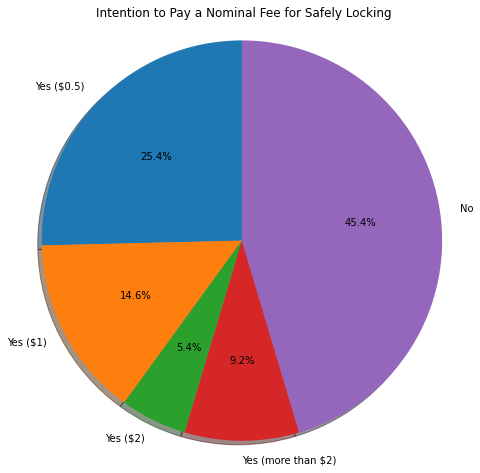

In [31]:
categories = ['Yes ($0.5)', 'Yes ($1)', 'Yes ($2)', 'Yes (more than $2)', 'No']
response_name = [1, 2, 3, 4, 5]

data = np.zeros(len(categories))
for i in range (len(data)):
    data[i] = np.sum(fl_survey_numeric_data['Q20'] == response_name[i])

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(data, labels=categories, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Intention to Pay a Nominal Fee for Safely Locking', y=1)

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

### Q21: Frequency of Riding to Transit Stops if Shared Micromobility is Available
- Q: If your community has a bicycle/scooter share system, how frequently do you use it to get to transit stops?
- A: Everyday, Once per week, 2-3 times per month, Never, n/a

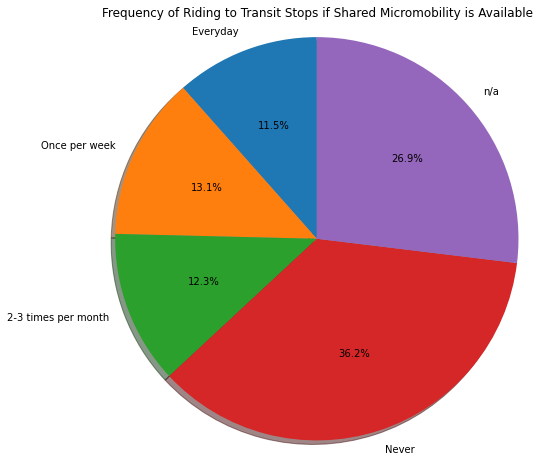

In [32]:
categories = ['Everyday', 'Once per week', '2-3 times per month', 'Never', 'n/a']
response_name = [1, 2, 3, 4, 5]

data = np.zeros(len(categories))
for i in range (len(data)):
    data[i] = np.sum(fl_survey_numeric_data['Q21'] == response_name[i])

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(data, labels=categories, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Frequency of Riding to Transit Stops if Shared Micromobility is Available', y=1)

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

### Q22: Why Not to Ride to Transit Stops
- Q: If you didn’t ride to transit stops, what prevents you from riding to transit stops (select all that apply)?
- A: Infrequent transit services, Too far to ride to transit, Geographic barriers (hills, slopes, bridges), Lack of adequate parking space near transit stops, Lack of safe bicycle/scooter storage near transit stops, Lack of accommodations for bike/scooter onboard transit vehicles, Lack of bike lanes or safe routes to transit, Lack of information on safe riding to transit stops, Fear of conflicts with buses/automobiles, I don’t use public transit, Weather, Others (Very close, Easier to walk, Not available)

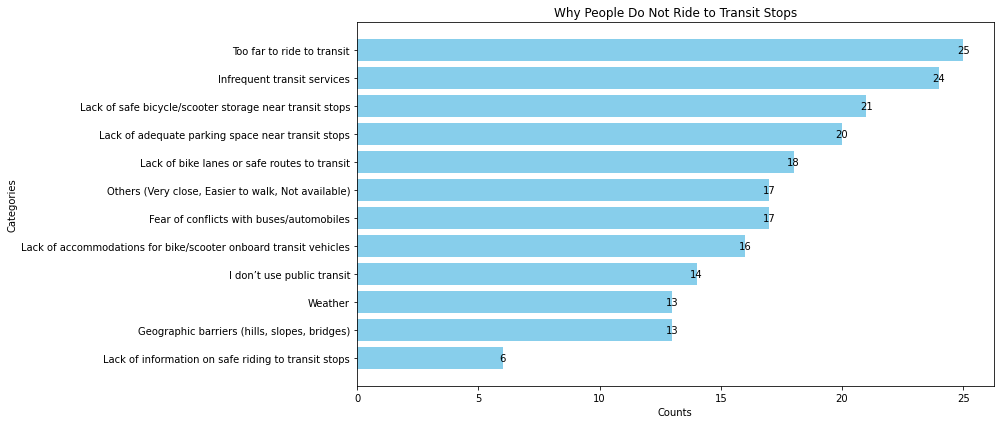

In [33]:
categories = ['Infrequent transit services', 'Too far to ride to transit', 'Geographic barriers (hills, slopes, bridges)',
              'Lack of adequate parking space near transit stops', 'Lack of safe bicycle/scooter storage near transit stops',
              'Lack of accommodations for bike/scooter onboard transit vehicles', 'Lack of bike lanes or safe routes to transit',
              'Lack of information on safe riding to transit stops', 'Fear of conflicts with buses/automobiles',
              'I don’t use public transit', 'Weather', 'Others (Very close, Easier to walk, Not available)']
response_name = ['1,', '2,', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
list_unique = list(fl_survey_numeric_data['Q22'].unique()[0]) + list(fl_survey_numeric_data['Q22'].unique()[2:])

data = np.zeros(len(categories))
data[0] = np.sum(fl_survey_numeric_data['Q22'] == '1')
data[1] = np.sum(fl_survey_numeric_data['Q22'] == '2')
for i in range (len(fl_survey_numeric_data['Q22'])):
    for j in range (len(response_name)):
        if fl_survey_numeric_data.iloc[i]['Q22'] in list_unique:
            if response_name[j] in fl_survey_numeric_data.iloc[i]['Q22']:
                data[j] += 1
data[0] = data[0] - 1

# Create a horizontal bar chart

sorted_data = sorted(zip(data, categories), reverse=False)
data, categories = zip(*sorted_data)

plt.figure(figsize=(14, 6))
bars = plt.barh(categories, data, color='skyblue')
plt.xlabel('Counts')
plt.ylabel('Categories')
plt.title('Why People Do Not Ride to Transit Stops')
#plt.axis('off')

for bar, value in zip(bars, data):
    plt.text(value, bar.get_y() + bar.get_height() / 2, int(value), ha='center', va='center', color='black')

# Display the chart
plt.tight_layout()
plt.show()

## User's Socio-demographics

### Q23: Gender
- Q: How do you identify?
- A: Male, Female, Nonbinary, I prefer not to answer

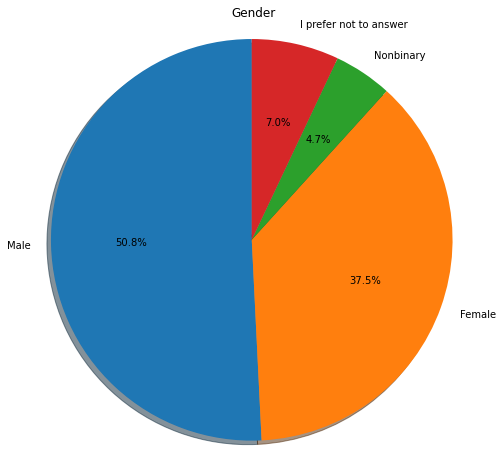

In [34]:
categories = ['Male', 'Female', 'Nonbinary', 'I prefer not to answer']
response_name = [1, 2, 3, 4]

data = np.zeros(len(categories))
for i in range (len(data)):
    data[i] = np.sum(fl_survey_numeric_data['Q23'] == response_name[i])

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(data, labels=categories, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Gender', y=1)

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

### Q24: Age Range
- Q: What age range do you fall into?
- A: Below 18, 18-24, 25-34, 35-44, 45-54, 55-64, 65-74, 75 and over

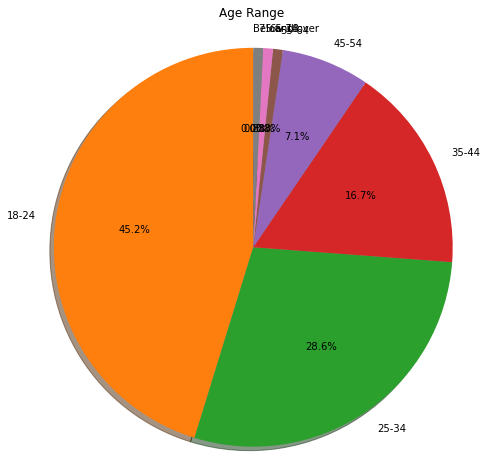

In [35]:
categories = ['Below 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75 and over']
response_name = [1, 2, 3, 4, 5, 6, 7, 8]

data = np.zeros(len(categories))
for i in range (len(data)):
    data[i] = np.sum(fl_survey_numeric_data['Q24'] == response_name[i])

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(data, labels=categories, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Age Range', y=1.02)

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

### Q25: Zipcode
- Q:  In what ZIP CODE do you reside? Please specify: 

### Q26: Ethical Group
- Q: With what ethnicities do you identify (select all that apply)?
- A: White, Black or African American, American Indian, Alaska Native, Asian, Native Hawaiian or Other Pacific Islander, Hispanic or Latinx, Other (Italian, Non-gringo)

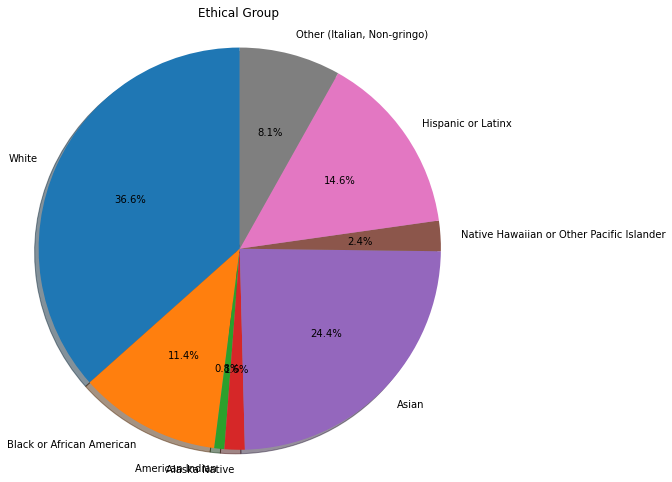

In [36]:
categories = ['White', 'Black or African American', 'American Indian', 'Alaska Native', 
              'Asian', 'Native Hawaiian or Other Pacific Islander', 'Hispanic or Latinx', 'Other (Italian, Non-gringo)']
response_name = [1, 2, 3, 4, 5, 6, 7, 8]

data = np.zeros(len(categories))
for i in range (len(data)):
    data[i] = np.sum(fl_survey_numeric_data['Q26'] == response_name[i])

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(data, labels=categories, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Ethical Group', y=1.02)

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

### Q27: Level of Education
- Q: What is the highest level of education you have completed?
- A: Below high school, High school graduate/GED, Some college, no degree, Associate degree, Bachelor’s degree, Master’s degree or higher, Prefer not to answer, Other

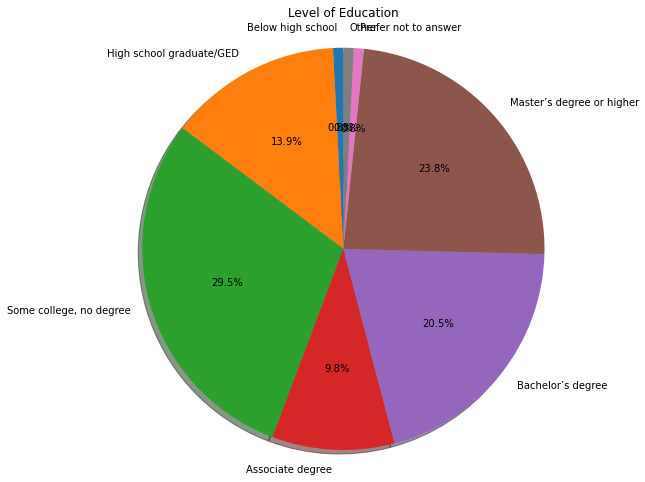

In [37]:
categories = ['Below high school', 'High school graduate/GED', 'Some college, no degree', 'Associate degree',
              'Bachelor’s degree', 'Master’s degree or higher', 'Prefer not to answer', 'Other']
response_name = [1, 2, 3, 4, 5, 6, 7, 8]

data = np.zeros(len(categories))
for i in range (len(data)):
    data[i] = np.sum(fl_survey_numeric_data['Q27'] == response_name[i])

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(data, labels=categories, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Level of Education', y=1.02)

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

### Q28: Employment Status
- Q: What is your current employment status?
- A: Work part-time, Work full-time, Self-employed, Not employed, Retired, Full-time student, Prefer not to answer, Other

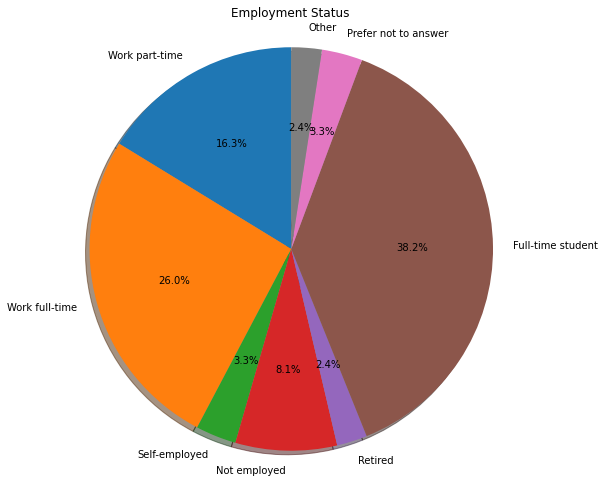

In [38]:
categories = ['Work part-time', 'Work full-time', 'Self-employed', 'Not employed',
              'Retired', 'Full-time student', 'Prefer not to answer',  'Other']
response_name = [1, 2, 3, 4, 5, 6, 7, 8]

data = np.zeros(len(categories))
for i in range (len(data)):
    data[i] = np.sum(fl_survey_numeric_data['Q28'] == response_name[i])

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(data, labels=categories, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Employment Status', y=1.02)

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

### Q29: Household Income
- Q: What is your annual household income?
- A: Less than $20k, $20k to $35k, $35k to $50k, $50k to $75k, $75k to $100k, Over $100k

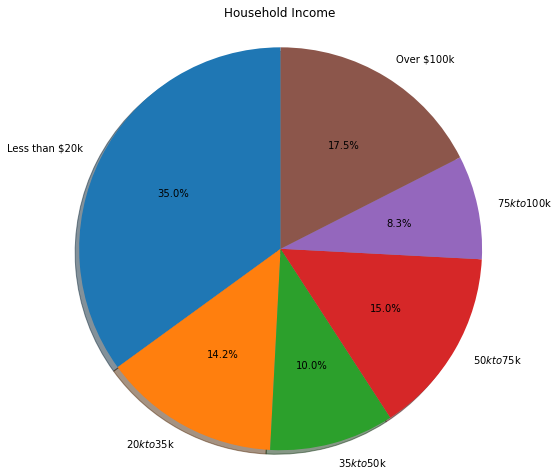

In [39]:
categories = ['Less than $20k', '$20k to $35k', '$35k to $50k', '$50k to $75k', '$75k to $100k', 'Over $100k']
response_name = [1, 2, 3, 4, 5, 6]

data = np.zeros(len(categories))
for i in range (len(data)):
    data[i] = np.sum(fl_survey_numeric_data['Q29'] == response_name[i])

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(data, labels=categories, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Household Income', y=1.02)

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

### Q30: Comments/Suggestions
- Q: Do you have any further thoughts or insights about riding bicycles or scooters?

In [40]:
fl_survey_numeric_data['Q30'].unique()

array([nan, 'no', 'No', 'None',
       "I would like to see the implementation of these bicycles and scooters, but proper education for safety is necessary. There are a lot of students who ride these and don't wear helmets, increasing their risk of injury. ",
       'Nope',
       "I wanted to rent a bike from UF's service, however they were already booked out for the semester. I would love for UF to make more bikes to rent out",
       'I would like one',
       'You should not put in the same analysis electric b/s and non-electric b/s',
       'I would like to ride a bike to campus but I don’t want to purchase a bike because it’s cheaper to ride the bus and I fear of getting my bike stolen or dangerous routes to ride such as on university ave ',
       'Na',
       'E-bikes are far safer and more useful than scooters. Separate paths are so much better than bike lanes I would almost consider bike lanes a useless investment. Plenty of existing research shows that people will bike if th

## FL survey text data

In [41]:
fl_survey_text_data = pd.read_csv('Data/Survey/FL_Micromobility_Usage_Survey_Text.csv')
fl_survey_text_data.head()

,StartDate,EndDate,Progress,Duration (in seconds),Finished,LocationLatitude,LocationLongitude,Intro,Q1_1,Q1_2,...,Q24,Q25,Q26,Q26_8_TEXT,Q27,Q27_8_TEXT,Q28,Q28_8_TEXT,Q29,Q30
0,9/6/2023 7:22,9/6/2023 7:31,100,527,True,29.6840,-82.3571,I Agree (Please continue to the survey),Everyday,Never,...,25-34,32607.0,Asian,NaN,Master’s degree or higher,NaN,Full-time student,NaN,$20k to $35k,NaN
1,9/7/2023 9:50,9/7/2023 9:55,29,254,False,NaN,NaN,I Agree (Please continue to the survey),Never,Never,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9/15/2023 15:53,9/15/2023 16:08,100,886,True,29.6138,-82.3860,I Agree (Please continue to the survey),Never,Never,...,25-34,32608.0,Asian,NaN,Master’s degree or higher,NaN,Full-time student,NaN,$20k to $35k,NaN
3,9/16/2023 13:48,9/16/2023 13:54,100,370,True,29.6138,-82.3860,I Agree (Please continue to the survey),Never,Never,...,25-34,NaN,Asian,NaN,Bachelor’s degree,NaN,Full-time student,NaN,Less than $20k,NaN
4,9/16/2023 14:23,9/16/2023 14:26,100,182,True,29.6475,-82.4040,I Agree (Please continue to the survey),Never,Never,...,18-24,32601.0,Asian,NaN,Master’s degree or higher,NaN,Work part-time,NaN,$50k to $75k,no


In [42]:
fl_survey_text_data.columns

Index(['StartDate', 'EndDate', 'Progress', 'Duration (in seconds)', 'Finished',
       'LocationLatitude', 'LocationLongitude', 'Intro', 'Q1_1', 'Q1_2',
       'Q1_3', 'Q1_4', 'Q1_5', 'Q1_5_TEXT', 'Q2', 'Q3', 'Q3_7_TEXT', 'Q4',
       'Q5_1', 'Q5_2', 'Q5_3', 'Q5_4', 'Q5_5', 'Q5_6', 'Q5_7', 'Q5_7_TEXT',
       'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11', 'Q11_12_TEXT', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q16_6_TEXT',
       'Q17', 'Q18', 'Q18_7_TEXT', 'Q19', 'Q19_7_TEXT', 'Q20', 'Q21', 'Q22',
       'Q22_12_TEXT', 'Q23', 'Q24', 'Q25', 'Q26', 'Q26_8_TEXT', 'Q27',
       'Q27_8_TEXT', 'Q28', 'Q28_8_TEXT', 'Q29', 'Q30'],
      dtype='object')